In [1]:
import cv2
import numpy as np
import easyocr
import pytesseract
import json
import matplotlib.pyplot as plt
import TextBoxProcessor
import LinesProcessor

# IMPORT Image

In [2]:
image_path = 'image1.png'
image = cv2.imread(image_path)


In [3]:
# 转换为灰度图
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## MLSD 线段提取

In [ ]:
from PIL import Image
import torch
from controlnet_aux import MLSDdetector
from diffusers.utils import load_image

2025-03-19 13:34:00.597182: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
from controlnet_aux import MLSDdetector

In [17]:
mlsd = MLSDdetector.from_pretrained('lllyasviel/ControlNet')
image = load_image(image_path).convert("RGB")
detected_edges = mlsd(image, detect_resolution=512, image_resolution=512)
edges_np = np.array(detected_edges)

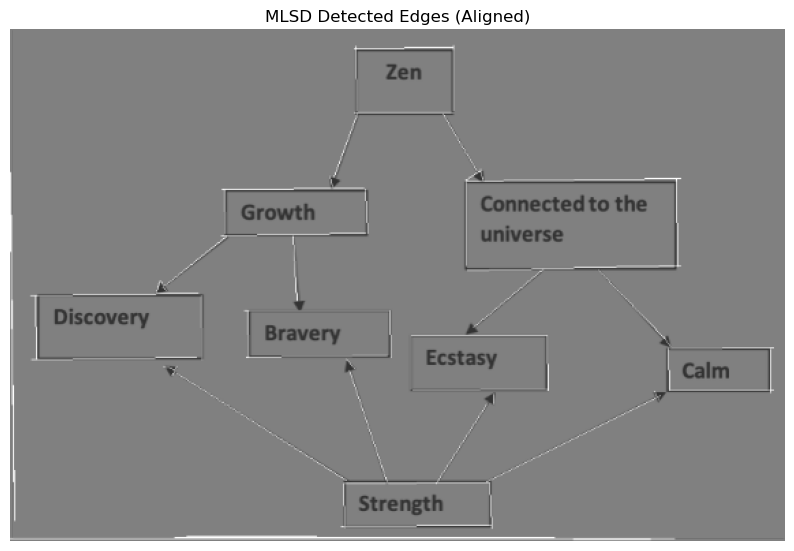

In [22]:
def detect_mlsd_lines(image_path, detect_resolution=512):
    """
    Detects line segments in an image using Mobile Line Segment Detector (MLSD).
    
    :param image_path: Path to the input image.
    :param detect_resolution: Resolution for MLSD detection.
    :return: A NumPy array representing the detected edges.
    """
    # Load original image
    image = load_image(image_path).convert("RGB")

    # Initialize MLSD detector
    mlsd = MLSDdetector.from_pretrained("lllyasviel/ControlNet")

    # Run MLSD model (this returns an edge-detected image)
    detected_edges = mlsd(image, detect_resolution=detect_resolution, image_resolution=detect_resolution)

    # Convert to NumPy array
    edges_np = np.array(detected_edges)

    # Resize MLSD edges to match the original image size
    original_size = Image.open(image_path).size  # (width, height)
    edges_resized = cv2.resize(edges_np, original_size, interpolation=cv2.INTER_LINEAR)

    return edges_resized

def plot_mlsd_edges(image_path, edges_np):
    """
    Plots the detected MLSD edges on the original image.

    :param image_path: Path to the original image.
    :param edges_np: NumPy array representing the detected edges.
    """
    # Load original image
    image = np.array(Image.open(image_path))

    # Create plot
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap="gray", alpha=0.6)  # Show original image
    plt.imshow(edges_np, cmap="hot", alpha=0.5)  # Overlay MLSD edges

    plt.title("MLSD Detected Edges (Aligned)")
    plt.axis("off")
    plt.show()

# Example usage
image_path = "image1.png"
detected_edges = detect_mlsd_lines(image_path)
plot_mlsd_edges(image_path, detected_edges)